In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import os
import matplotlib.pyplot as plt

In [2]:
ufo_df = pd.read_csv("results/ufo_caputre_dbscan_eps_30.csv")
drive = "/run/media/mateusz/Seagate Expansion Drive/all"

for index, row in ufo_df.iterrows():
    p = Path(row['common_pathname'])
    p = drive / p
    ufo_df.at[index, 'file'] = str(p) + ".avi"


In [3]:
ufo_df

,Unnamed: 0,common_filename,common_pathname,cell_id,time_bin_10,box_x_max,box_x_min,box_y_max,box_y_min,centeroid_pixel_x,...,rect_shape_diameter,rect_shape_height,rect_shape_width,rect_x_max,rect_x_min,rect_y_max,rect_y_min,size,solidity,file
0,0,M20190901_060319_USUtah_CRC_N1,CRC/M20190901_060319_USUtah_CRC_N1,27.0,-1,192,0,192,0,1330,...,228.078934,186,132,1403,1271,312,126,310,0.440341,/run/media/mateusz/Seagate Expansion Drive/all...
1,1,M20190901_060319_USUtah_CRC_N1,CRC/M20190901_060319_USUtah_CRC_N1,133.0,-1,192,0,192,0,633,...,31.320920,30,9,636,627,1077,1047,22,0.301370,/run/media/mateusz/Seagate Expansion Drive/all...
2,2,M20190901_060522_USUtah_CRC_N1,CRC/M20190901_060522_USUtah_CRC_N1,136.0,-1,192,0,192,0,1040,...,172.185946,148,88,1083,995,1058,910,393,0.601838,/run/media/mateusz/Seagate Expansion Drive/all...
3,3,M20190901_060608_USUtah_CRC_N1,CRC/M20190901_060608_USUtah_CRC_N1,121.0,-1,192,0,192,0,1194,...,16.401219,13,10,1200,1190,892,879,37,0.596774,/run/media/mateusz/Seagate Expansion Drive/all...
4,4,M20190901_060632_USUtah_CRC_N1,CRC/M20190901_060632_USUtah_CRC_N1,16.0,-1,192,0,192,0,102,...,36.359318,19,31,110,79,208,189,46,0.418182,/run/media/mateusz/Seagate Expansion Drive/all...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3719,3719,M20190831_102452_USUtah_UT2_N2,N2Backup190830/UTAH2019/2019/201908/20190830/M...,87.0,-1,192,0,192,0,947,...,86.729464,31,81,983,902,618,587,49,0.228972,/run/media/mateusz/Seagate Expansion Drive/all...
3720,3720,M20190831_102610_USUtah_UT2_N2,N2Backup190830/UTAH2019/2019/201908/20190830/M...,74.0,-1,192,0,192,0,1245,...,3.605551,3,2,1246,1244,518,515,9,0.900000,/run/media/mateusz/Seagate Expansion Drive/all...
3721,3721,M20190831_102637_USUtah_UT2_N2,N2Backup190830/UTAH2019/2019/201908/20190830/M...,115.0,-1,192,0,192,0,366,...,49.030603,10,48,396,348,901,891,38,0.237500,/run/media/mateusz/Seagate Expansion Drive/all...
3722,3722,M20190831_102806_USUtah_UT2_N2,N2Backup190830/UTAH2019/2019/201908/20190830/M...,137.0,-1,192,0,192,0,1101,...,3.605551,2,3,1103,1100,1011,1009,10,0.909091,/run/media/mateusz/Seagate Expansion Drive/all...


In [4]:
ufo_df.columns

Index(['Unnamed: 0', 'common_filename', 'common_pathname', 'cell_id',
       'time_bin_10', 'box_x_max', 'box_x_min', 'box_y_max', 'box_y_min',
       'centeroid_pixel_x', 'centeroid_pixel_y', 'eccentricity', 'frame_count',
       'frame_sequence_pathname', 'im2box_x_max', 'im2box_x_min',
       'im2box_y_max', 'im2box_y_min', 'major_axis_length',
       'minor_axis_length', 'orientation', 'rect_centeroid_x',
       'rect_centeroid_y', 'rect_shape_diameter', 'rect_shape_height',
       'rect_shape_width', 'rect_x_max', 'rect_x_min', 'rect_y_max',
       'rect_y_min', 'size', 'solidity', 'file'],
      dtype='object')

In [5]:
import CustomAlgorithm as ca


my_df = pd.read_csv("results/2021-08-11/2021-08-11.csv")


In [37]:
for index, row in my_df.iterrows():
    p = Path(row['file'])
    p = Path(*p.parts[5:])
    p = drive / p
    my_df.at[index, 'file'] = str(p)
    ti = ca.TriggerInfo.from_csv_row(row)
    my_df.at[index, 'cell_id'] = ti.get_section()
    my_df.at[index, "center_x"] = ti.get_center().x
    my_df.at[index, "center_y"] = ti.get_center().y

my_df

,Unnamed: 0,file,start_frame,end_frame,box_up_left_x,box_up_left_y,box_down_right_x,box_down_right_y,length,count,section,line_fir,cell_id,center_x,center_y
0,0,/run/media/mateusz/Seagate Expansion Drive/all...,28,37,663,1018,698,1047,44.045429,10,133,0.998820,133.0,680.0,1032.0
1,1,/run/media/mateusz/Seagate Expansion Drive/all...,3,78,517,120,540,132,24.596748,130,20,0.994831,20.0,528.0,126.0
2,2,/run/media/mateusz/Seagate Expansion Drive/all...,28,34,1243,208,1274,241,40.311287,6,26,0.825687,26.0,1258.0,224.0
3,3,/run/media/mateusz/Seagate Expansion Drive/all...,32,36,1286,246,1323,281,43.863426,5,42,0.999674,42.0,1304.0,263.0
4,4,/run/media/mateusz/Seagate Expansion Drive/all...,39,42,1359,314,1388,340,48.836460,4,43,1.000000,43.0,1373.0,327.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3191,3191,/run/media/mateusz/Seagate Expansion Drive/all...,28,42,1128,868,1166,970,108.503456,15,121,-0.997019,121.0,1147.0,919.0
3192,3192,/run/media/mateusz/Seagate Expansion Drive/all...,26,32,433,912,463,963,59.169250,7,115,-0.997795,115.0,448.0,937.0
3193,3193,/run/media/mateusz/Seagate Expansion Drive/all...,28,34,1574,774,1592,807,39.824615,7,109,0.998822,109.0,1583.0,790.0
3194,3194,/run/media/mateusz/Seagate Expansion Drive/all...,24,45,702,239,806,460,243.772430,22,38,-0.998982,38.0,754.0,349.0


In [7]:
my_df.columns

Index(['Unnamed: 0', 'file', 'start_frame', 'end_frame', 'box_up_left_x',
       'box_up_left_y', 'box_down_right_x', 'box_down_right_y', 'length',
       'count', 'section', 'line_fir', 'cell_id', 'center_x', 'center_y'],
      dtype='object')

In [25]:
merged_df = pd.merge(
    left=my_df, left_on=['file','cell_id'],
    right=ufo_df, right_on=['file','cell_id']     
)

# merged_df = pd.merge(
#     left=my_df, left_on=['file'],
#     right=ufo_df, right_on=['file']     
# )


merged_df

,Unnamed: 0_x,file,start_frame,end_frame,box_up_left_x,box_up_left_y,box_down_right_x,box_down_right_y,length,count,...,rect_centeroid_y,rect_shape_diameter,rect_shape_height,rect_shape_width,rect_x_max,rect_x_min,rect_y_max,rect_y_min,size,solidity
0,0,/run/media/mateusz/Seagate Expansion Drive/all...,28,37,663,1018,698,1047,44.045429,10,...,11.540541,44.045431,28,34,703,669,1050,1022,74,0.540146
1,3,/run/media/mateusz/Seagate Expansion Drive/all...,32,36,1286,246,1323,281,43.863426,5,...,54.782241,167.705098,114,123,1383,1260,336,222,473,0.493222
2,7,/run/media/mateusz/Seagate Expansion Drive/all...,28,34,559,723,577,790,71.568146,7,...,18.988506,47.539457,46,12,575,563,786,740,87,0.564935
3,8,/run/media/mateusz/Seagate Expansion Drive/all...,28,33,1873,701,1915,754,68.249542,6,...,17.826772,52.497619,40,34,1903,1869,758,718,127,0.654639
4,14,/run/media/mateusz/Seagate Expansion Drive/all...,29,34,1843,594,1852,656,65.490456,6,...,24.333333,53.600373,53,8,1851,1843,654,601,156,0.722222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1820,3189,/run/media/mateusz/Seagate Expansion Drive/all...,27,36,90,528,129,619,98.086693,10,...,18.266667,48.332184,44,20,117,97,600,556,30,0.256410
1821,3191,/run/media/mateusz/Seagate Expansion Drive/all...,28,42,1128,868,1166,970,108.503456,15,...,28.043478,78.771822,74,27,1160,1133,956,882,46,0.258427
1822,3192,/run/media/mateusz/Seagate Expansion Drive/all...,26,32,433,912,463,963,59.169250,7,...,5.583333,19.723083,17,10,443,433,962,945,12,0.292683
1823,3193,/run/media/mateusz/Seagate Expansion Drive/all...,28,34,1574,774,1592,807,39.824615,7,...,6.944444,16.552945,15,7,1587,1580,799,784,18,0.486486


In [9]:
merged_df.columns

Index(['Unnamed: 0_x', 'file', 'start_frame', 'end_frame', 'box_up_left_x',
       'box_up_left_y', 'box_down_right_x', 'box_down_right_y', 'length',
       'count', 'section', 'line_fir', 'cell_id_x', 'center_x', 'center_y',
       'Unnamed: 0_y', 'common_filename', 'common_pathname', 'cell_id_y',
       'time_bin_10', 'box_x_max', 'box_x_min', 'box_y_max', 'box_y_min',
       'centeroid_pixel_x', 'centeroid_pixel_y', 'eccentricity', 'frame_count',
       'frame_sequence_pathname', 'im2box_x_max', 'im2box_x_min',
       'im2box_y_max', 'im2box_y_min', 'major_axis_length',
       'minor_axis_length', 'orientation', 'rect_centeroid_x',
       'rect_centeroid_y', 'rect_shape_diameter', 'rect_shape_height',
       'rect_shape_width', 'rect_x_max', 'rect_x_min', 'rect_y_max',
       'rect_y_min', 'size', 'solidity'],
      dtype='object')

In [24]:
merged_df.iloc[1]["file"]

'/run/media/mateusz/Seagate Expansion Drive/all/N2Backup190830/UTAH2019/2019/201908/20190828/M20190829_104049_USUtah_UT1_N2.avi'

In [10]:
import math
dxs = []
dys = []
for idx, row in merged_df.iterrows():
    dxs.append(row["center_x"] - row["centeroid_pixel_x"])
    dys.append(row["center_y"] - row["centeroid_pixel_y"])

deltas = []
for x, y in zip(dxs, dys):
    deltas.append(math.sqrt(x ** 2 + y ** 2))

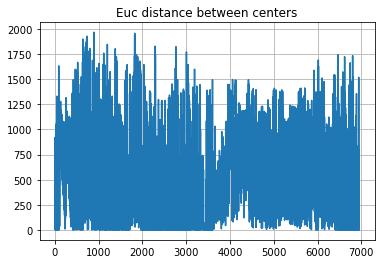

In [11]:
plt.Figure(figsize=(200,200))
plt.grid(True)
plt.title("Euc distance between centers")
plt.plot(deltas)

In [36]:
print(np.average(deltas))

485.1417421690772


In [12]:
# df_all = df1.merge(df2.drop_duplicates(), on=['col1','col2'], 
#                    how='left', indicator=True)
# df_all


df_all = my_df.merge(ufo_df.drop_duplicates(), on=['file','cell_id'], 
                   how='left', indicator=True)
df_all

,Unnamed: 0_x,file,start_frame,end_frame,box_up_left_x,box_up_left_y,box_down_right_x,box_down_right_y,length,count,...,rect_shape_diameter,rect_shape_height,rect_shape_width,rect_x_max,rect_x_min,rect_y_max,rect_y_min,size,solidity,_merge
0,0,/run/media/mateusz/Seagate Expansion Drive/all...,28,37,663,1018,698,1047,44.045429,10,...,44.045431,28.0,34.0,703.0,669.0,1050.0,1022.0,74.0,0.540146,both
1,1,/run/media/mateusz/Seagate Expansion Drive/all...,3,78,517,120,540,132,24.596748,130,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
2,2,/run/media/mateusz/Seagate Expansion Drive/all...,28,34,1243,208,1274,241,40.311287,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
3,3,/run/media/mateusz/Seagate Expansion Drive/all...,32,36,1286,246,1323,281,43.863426,5,...,167.705098,114.0,123.0,1383.0,1260.0,336.0,222.0,473.0,0.493222,both
4,4,/run/media/mateusz/Seagate Expansion Drive/all...,39,42,1359,314,1388,340,48.836460,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3202,3191,/run/media/mateusz/Seagate Expansion Drive/all...,28,42,1128,868,1166,970,108.503456,15,...,78.771822,74.0,27.0,1160.0,1133.0,956.0,882.0,46.0,0.258427,both
3203,3192,/run/media/mateusz/Seagate Expansion Drive/all...,26,32,433,912,463,963,59.169250,7,...,19.723083,17.0,10.0,443.0,433.0,962.0,945.0,12.0,0.292683,both
3204,3193,/run/media/mateusz/Seagate Expansion Drive/all...,28,34,1574,774,1592,807,39.824615,7,...,16.552945,15.0,7.0,1587.0,1580.0,799.0,784.0,18.0,0.486486,both
3205,3194,/run/media/mateusz/Seagate Expansion Drive/all...,24,45,702,239,806,460,243.772430,22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [13]:
lookup = df_all['_merge'] == 'left_only'

diff = []
for idx, row in df_all.iterrows():
    if lookup[idx]:
        diff.append(row)


diff = pd.DataFrame(diff, columns=df_all.columns)
diff

,Unnamed: 0_x,file,start_frame,end_frame,box_up_left_x,box_up_left_y,box_down_right_x,box_down_right_y,length,count,...,rect_shape_diameter,rect_shape_height,rect_shape_width,rect_x_max,rect_x_min,rect_y_max,rect_y_min,size,solidity,_merge
1,1,/run/media/mateusz/Seagate Expansion Drive/all...,3,78,517,120,540,132,24.596748,130,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
2,2,/run/media/mateusz/Seagate Expansion Drive/all...,28,34,1243,208,1274,241,40.311287,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
4,4,/run/media/mateusz/Seagate Expansion Drive/all...,39,42,1359,314,1388,340,48.836460,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
5,5,/run/media/mateusz/Seagate Expansion Drive/all...,4,112,1170,844,1195,847,23.086792,192,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
6,6,/run/media/mateusz/Seagate Expansion Drive/all...,5,59,575,446,588,473,29.966648,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3192,3181,/run/media/mateusz/Seagate Expansion Drive/all...,57,62,1739,371,1757,383,23.021729,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
3193,3182,/run/media/mateusz/Seagate Expansion Drive/all...,29,33,539,978,540,1000,23.021729,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
3196,3185,/run/media/mateusz/Seagate Expansion Drive/all...,37,40,850,144,858,176,32.984844,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
3201,3190,/run/media/mateusz/Seagate Expansion Drive/all...,7,15,1185,646,1198,666,21.954498,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [14]:
%matplotlib inline

import cv2
diff = df_all[df_all['_merge'] == 'left_only']



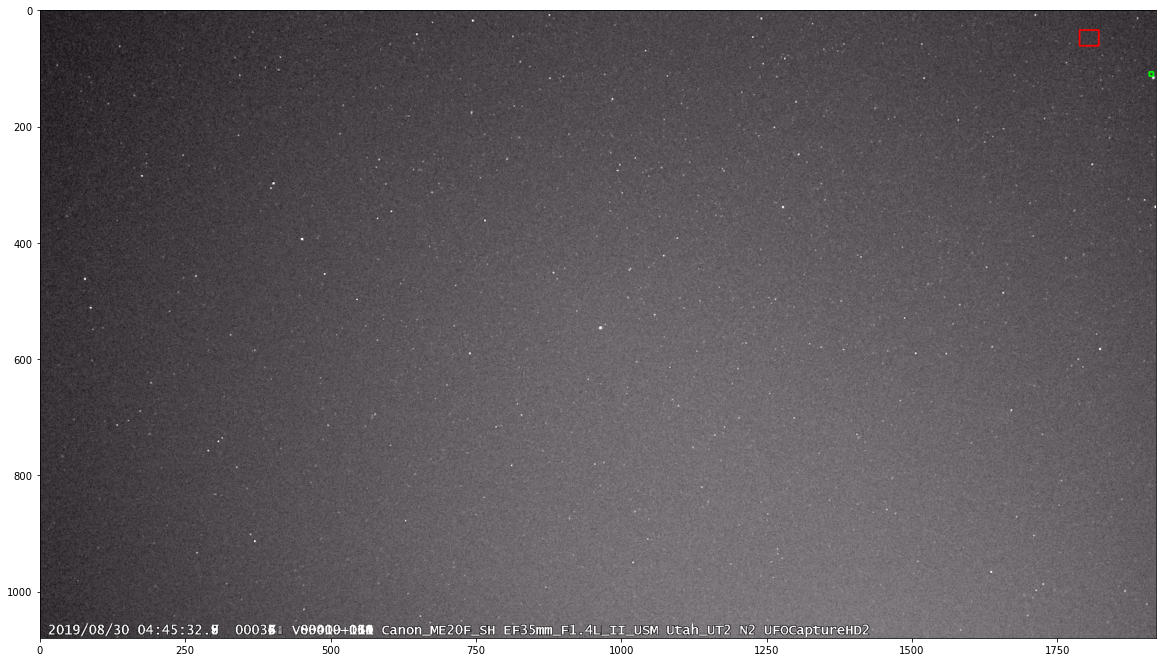

In [45]:

def save_both(df, row_idx):
    a = ca.prepare_trigger_frame(ca.TriggerInfo.from_csv_row(df.iloc[row_idx]) )
    row = df.iloc[row_idx]

    cv2.rectangle(a, (row['rect_x_max'], row['rect_y_max']), (row['rect_x_min'], row['rect_y_min']), (255, 0, 0), 2)
    return a



plt.figure(figsize=(20,20))
plt.imshow(save_both(merged_df,100))
# # show_raw(filename, start_frame, end_frame, rect_start, rect_stop, size=(1920 // 120, 1080 // 120)):
# b = ca.show_raw(row["file"], 0, None, (row['rect_x_max'], row['rect_y_max']), (row['rect_x_min'], row['rect_y_min']))

In [16]:
from collections import namedtuple

Rect = namedtuple('Rect', ["xmin", "ymin","xmax",'ymax' ])


# adapted from https://stackoverflow.com/a/27162334
def intersected_area(a, b): # returns None if rectangles don't intersect
    dx = min(a.xmax, b.xmax) - max(a.xmin, b.xmin)
    dy = min(a.ymax, b.ymax) - max(a.ymin, b.ymin)
    if (dx>=0) and (dy>=0):
        return dx*dy
    return 0

def area(rect):
    a = (rect.xmax - rect.xmin)
    b = (rect.ymax - rect.ymin)
    if a == 0:
        a = 1
    if b == 0:
        b = 1
    return a * b


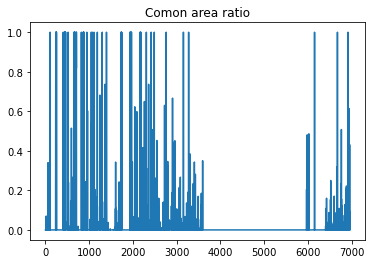

In [17]:

areas = []
for idx, row in merged_df.iterrows():
    a = Rect(row["box_up_left_x"], row["box_up_left_y"],
             row["box_down_right_x"], row["box_down_right_y"])

    b = Rect(row['rect_x_max'], row['rect_x_min'], row['rect_y_max'], row['rect_y_min'])

    smaller_area = min(area(a),area(b))

    if smaller_area == 0:
        print(a, b)

    ratio = intersected_area(a,b)/smaller_area
    areas.append(ratio)
    if ratio > 0.1:
        pass
        # print(f"saving {idx}")
        # plt.imsave(f"tmp/{ca.TriggerInfo.from_csv_row(merged_df.iloc[idx]).get_uid()}.png", save_both(merged_df,idx))

# plt.yscale('log')
plt.title("Comon area ratio")
plt.plot(areas)

In [18]:
len([area for area in areas if area > 0.1])

205

In [26]:
plt.hist(areas,bins=20)

(array([6.678e+03, 7.100e+01, 3.100e+01, 2.300e+01, 1.300e+01, 9.000e+00,
        1.000e+01, 3.000e+00, 7.000e+00, 4.000e+00, 6.000e+00, 1.000e+00,
        6.000e+00, 2.000e+00, 4.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 8.400e+01]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

In [20]:
filtered = [ratio for ratio in areas if ratio > 0.1]

(array([52., 20., 15., 10.,  8.,  6.,  3.,  6.,  1., 84.]),
 array([0.10087719, 0.19078947, 0.28070175, 0.37061404, 0.46052632,
        0.5504386 , 0.64035088, 0.73026316, 0.82017544, 0.91008772,
        1.        ]),
 <BarContainer object of 10 artists>)

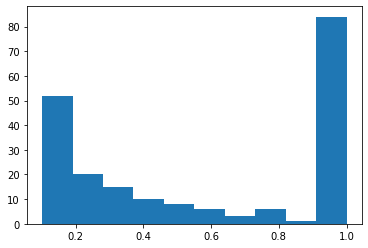

In [21]:
plt.hist(filtered)

In [22]:

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.animation as animation

from IPython.core.display import HTML, display
def animate_trigger(trigger):
    imgs = trigger.section_cutout() # some array of images
    # imgs = [[frame[min_y:max_y, min_x:max_x]] for frame in frames]
    animation_frames = []  # for storing the generated images

    fig = plt.figure()
    for img in imgs:
        # frames.append([plt.imshow(img[i], cmap=cm.Greys_r, animated=True)])
        try:
            animation_frames.append([plt.imshow(img[0], animated=True)])
        except Exception:
            print(img)


    ani = animation.ArtistAnimation(fig,
                                    animation_frames,
                                    interval=100,
                                    blit=True,
                                    repeat_delay=10)
    # ani.save('movie.mp4')
    display(HTML(ani.to_jshtml()))

Unnamed: 0_x                                                            3162
file                       /run/media/mateusz/Seagate Expansion Drive/all...
start_frame                                                               27
end_frame                                                                 31
box_up_left_x                                                           1100
box_up_left_y                                                            814
box_down_right_x                                                        1103
box_down_right_y                                                         836
length                                                             20.396078
count                                                                      4
section                                                                  105
line_fir                                                           -0.998325
cell_id                                                                105.0

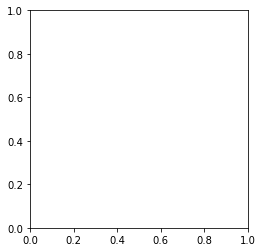

In [46]:

%matplotlib inline
print(merged_df.iloc[1800])

t = ca.TriggerInfo.from_csv_row(merged_df.iloc[100])

animate_trigger(t)

# t.animate()

